In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.stats.diagnostic import acorr_ljungbox
    

In [4]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\NLP\Data\ML471_S2_Datafile_Concept(in).csv")

df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

df = df.asfreq('MS')

series = df['Power_Consumption_diff'].dropna()

train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

best_aic = np.inf
best_lag = 0

for lag in range(1, 15):
    try:
        model = AutoReg(train, lags=lag).fit()
        if model.aic < best_aic:
            best_aic = model.aic
            best_lag = lag
    except Exception as e:
        continue
print("Best AR lag:", best_lag)
print("Best AIC:", best_aic)

final_model = AutoReg(train, lags=best_lag).fit()

print("AR MODEL SUMMARY")
print(final_model.summary())

ljung_box = acorr_ljungbox(final_model.resid, lags=best_lag, return_df=True)
print("LJUNG-BOX TEST")
print(ljung_box)

forecast = final_model.predict(start=test.index[0], end=test.index[-1])

Best AR lag: 14
Best AIC: 1417.2408771886726
AR MODEL SUMMARY
                              AutoReg Model Results                               
Dep. Variable:     Power_Consumption_diff   No. Observations:                  316
Model:                        AutoReg(14)   Log Likelihood                -692.620
Method:                   Conditional MLE   S.D. of innovations              2.398
Date:                    Wed, 28 Jan 2026   AIC                           1417.241
Time:                            15:57:35   BIC                           1476.608
Sample:                        04-01-1989   HQIC                          1440.994
                             - 05-01-2014                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.5791      0.166      3.483      0.000       0.253  

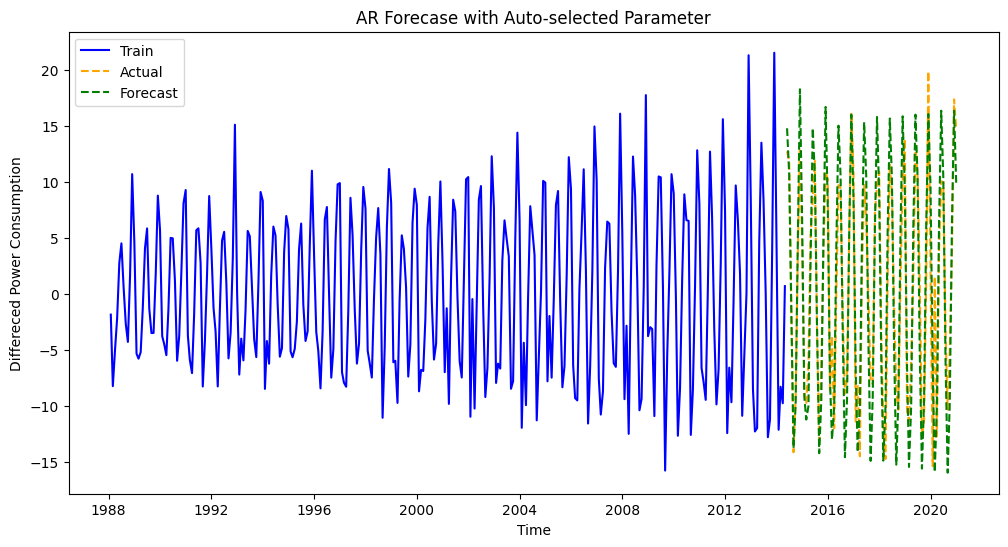

In [5]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Actual', color='orange', linestyle='--')
plt.plot(forecast.index, forecast, label='Forecast', color='green', linestyle="--")

plt.title("AR Forecase with Auto-selected Parameter")
plt.xlabel("Time")
plt.ylabel("Differeced Power Consumption")
plt.legend()
plt.show()